
📋 Customer Segment Counts:

Customer_Segment
Others                  10975
Loyal Customers          3252
Potential Loyalists      1406
New Customers            1401
At-Risk Customers        1165
Lost Customers           1024
High-Value Customers      551
Name: count, dtype: int64


C:\Users\Kunal\AppData\Local\Temp\ipykernel_24820\2148322578.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')


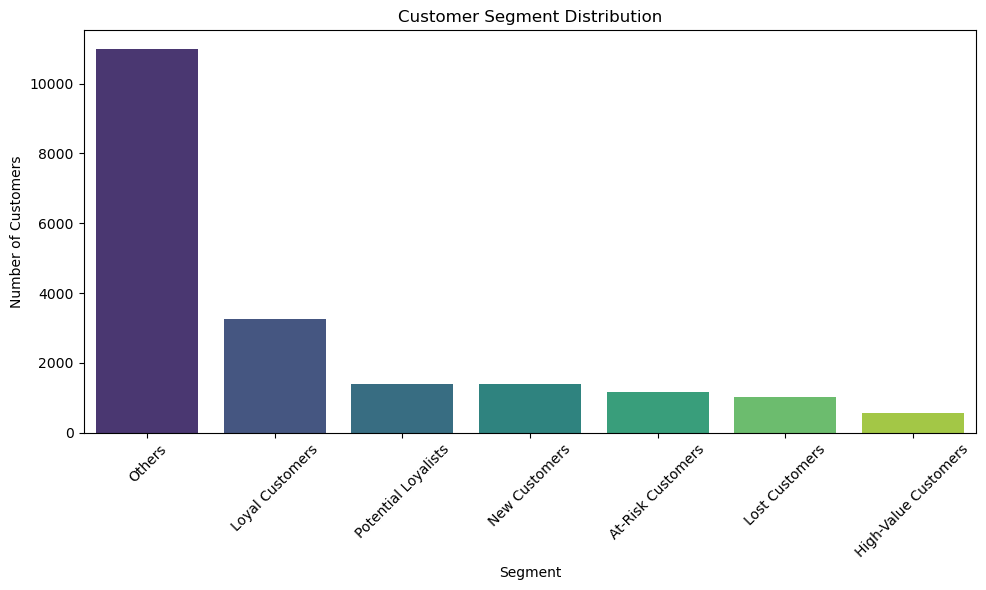

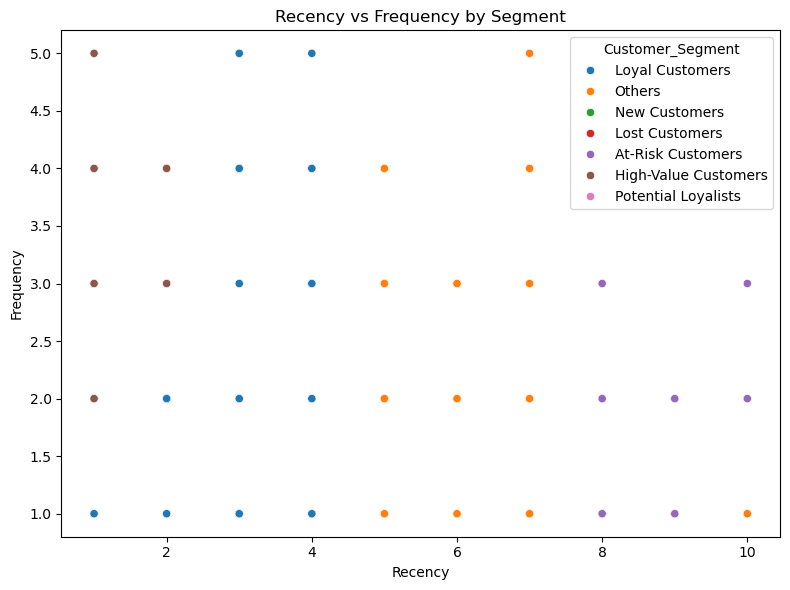

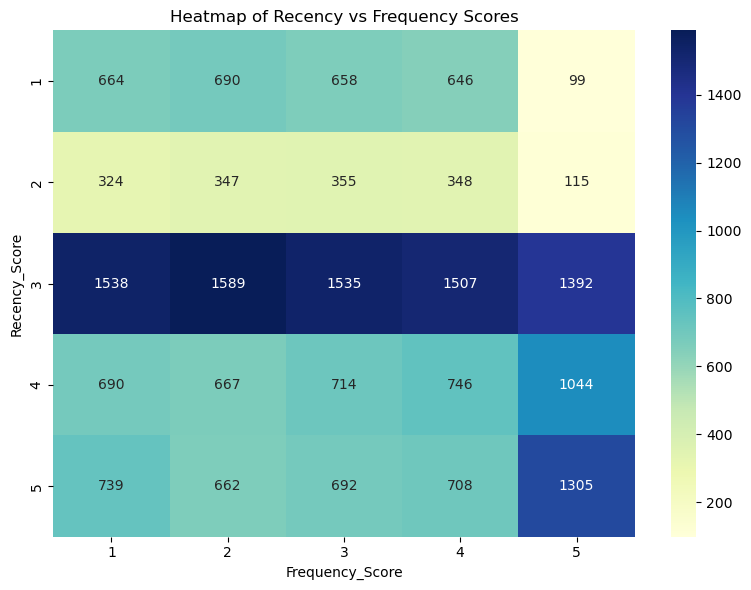

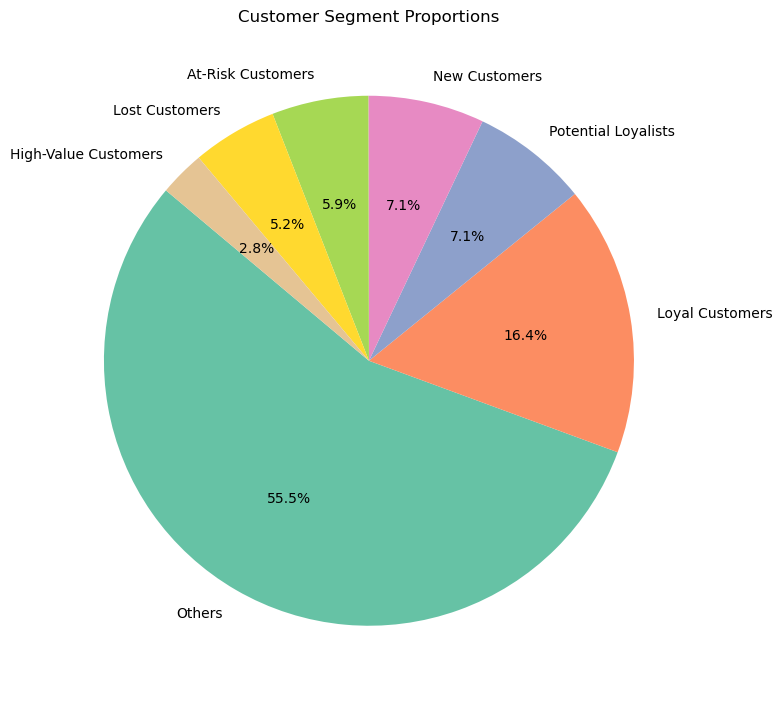


🎯 Marketing Recommendations:
• High-Value Customers → Reward with loyalty perks.
• Loyal Customers → Send exclusive product previews.
• At-Risk Customers → Use reminder and discount emails.
• New Customers → Nurture with onboarding offers.
• Lost Customers → Win-back with aggressive offers.
• Potential Loyalists → Encourage with reward points.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load and clean data
df = pd.read_csv("ecommerce_data_final_cleaned.csv")

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Drop rows with missing customer IDs or values
df.dropna(subset=['customer_id', 'value [USD]'], inplace=True)

# Step 2: Calculate RFM Metrics
snapshot_date = df['date'].max() + pd.Timedelta(days=1)

rfm = df.groupby('customer_id').agg({
    'date': lambda x: (snapshot_date - x.max()).days,
    'customer_id': 'count',
    'value [USD]': 'sum'
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Step 3: Create RFM scores (1–5 scale)
rfm['Recency_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1]).astype(int)
rfm['Frequency_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)
rfm['Monetary_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5]).astype(int)

rfm['RFM_Score'] = rfm['Recency_Score'].astype(str) + rfm['Frequency_Score'].astype(str) + rfm['Monetary_Score'].astype(str)

# Step 4: Segment customers based on RFM score
def assign_segment(row):
    r, f, m = row['Recency_Score'], row['Frequency_Score'], row['Monetary_Score']
    if r == 5 and f == 5 and m == 5:
        return 'High-Value Customers'
    elif r >= 4 and f >= 4:
        return 'Loyal Customers'
    elif r <= 2 and f >= 3 and m >= 3:
        return 'At-Risk Customers'
    elif r == 5 and f <= 2:
        return 'New Customers'
    elif r <= 2 and f <= 2 and m <= 2:
        return 'Lost Customers'
    elif r >= 4 and f >= 3:
        return 'Potential Loyalists'
    else:
        return 'Others'

rfm['Customer_Segment'] = rfm.apply(assign_segment, axis=1)

# 🎯 Summary Counts
print("\n📋 Customer Segment Counts:\n")
print(rfm['Customer_Segment'].value_counts())

# ----------------------------------------
# 📊 Visualizations
# ----------------------------------------

# 1️⃣ Bar Chart - Segment Distribution
plt.figure(figsize=(10, 6))
segment_counts = rfm['Customer_Segment'].value_counts()
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='viridis')
plt.title("Customer Segment Distribution")
plt.ylabel("Number of Customers")
plt.xlabel("Segment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2️⃣ Scatter Plot - Recency vs Frequency
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rfm, x='Recency', y='Frequency', hue='Customer_Segment', palette='tab10')
plt.title("Recency vs Frequency by Segment")
plt.tight_layout()
plt.show()

# 3️⃣ Heatmap - RFM Score Density
heatmap_data = rfm.groupby(['Recency_Score', 'Frequency_Score']).size().unstack()
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="g")
plt.title("Heatmap of Recency vs Frequency Scores")
plt.tight_layout()
plt.show()

# 4️⃣ Pie Chart - Segment Proportions
plt.figure(figsize=(8, 8))
rfm['Customer_Segment'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title("Customer Segment Proportions")
plt.ylabel("")
plt.tight_layout()
plt.show()

# ✅ Optional: Save the final RFM DataFrame
rfm.to_csv("rfm_segmented_customers.csv")

# 🧠 Marketing Suggestions
print("\n🎯 Marketing Recommendations:")
print("• High-Value Customers → Reward with loyalty perks.")
print("• Loyal Customers → Send exclusive product previews.")
print("• At-Risk Customers → Use reminder and discount emails.")
print("• New Customers → Nurture with onboarding offers.")
print("• Lost Customers → Win-back with aggressive offers.")
print("• Potential Loyalists → Encourage with reward points.")
